In [1]:
import pandas as pd
import numpy as np
import os
import plotly.offline as py
py.init_notebook_mode(connected=False)
import plotly.graph_objs as go
import json
import cufflinks as cf
import seaborn as sns
cf.set_config_file(offline=True)
import json
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling
import requests

In [58]:
fire_nrt_V1 = pd.read_csv('fire_nrt_V1_96617.csv')
fire_nrt_V1

latitude  longitude  bright_ti4  scan  track    acq_date  acq_time  \
0      -42.69706  147.70634       333.6  0.57   0.43  2019-10-01       336   
1      -42.26889  147.31104       336.2  0.39   0.44  2019-10-01       336   
2      -40.85202  145.38068       327.9  0.46   0.47  2019-10-01       336   
3      -42.39329  147.47144       346.9  0.38   0.43  2019-10-01       336   
4      -42.69701  147.70584       334.1  0.56   0.43  2019-10-01       336   
...          ...        ...         ...   ...    ...         ...       ...   
956252 -32.66628  122.15253       306.9  0.39   0.44  2020-01-11      1630   
956253 -32.58616  123.39582       299.0  0.51   0.41  2020-01-11      1630   
956254 -33.37853  115.94735       309.7  0.40   0.60  2020-01-11      1630   
956255 -33.21827  115.75078       300.2  0.49   0.65  2020-01-11      1806   
956256 -33.22012  115.75043       300.3  0.49   0.65  2020-01-11      1806   

       satellite instrument confidence version  bright_ti5  frp daynight  
0              N      VIIRS          n  1.0NRT       293.4  4.0        D  
1              N      VIIRS          n  1.0NRT       296.9  3.9        D  
2              N      VIIRS          n  1.0NRT       295.3  3.7        D  
3              N      VIIRS          n  1.0NRT       294.2  6.2        D  
4              N      VIIRS          n  1.0NRT       293.5  4.1        D  
...          ...        ...        ...     ...         ...  ...      ...  
956252         N      VIIRS          n  1.0NRT       288.6  0.8        N  
956253         N      VIIRS          n  1.0NRT       287.4  0.7        N  
956254         N      VIIRS          n  1.0NRT       291.7  1.0        N  
956255         N      VIIRS          n  1.0NRT       290.2  1.1        N  
956256         N      VIIRS          n  1.0NRT       290.0  0.6        N  

[956257 rows x 14 columns]

In [59]:
fire_nrt_M6 = pd.read_csv('fire_nrt_M6_96619.csv')
fire_nrt_M6

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0        -14.281    143.636       323.9   1.7    1.3  2019-10-01        25   
1        -14.284    143.532       343.5   1.7    1.3  2019-10-01        25   
2        -14.302    143.706       320.2   1.7    1.3  2019-10-01        25   
3        -14.283    143.652       320.4   1.7    1.3  2019-10-01        25   
4        -14.285    143.521       349.4   1.7    1.3  2019-10-01        25   
...          ...        ...         ...   ...    ...         ...       ...   
183588   -32.675    122.113       300.5   2.4    1.5  2020-01-11      1515   
183589   -16.708    129.646       300.5   1.0    1.0  2020-01-11      1645   
183590   -16.747    129.653       301.8   1.0    1.0  2020-01-11      1645   
183591   -32.484    121.319       306.5   1.4    1.2  2020-01-11      1650   
183592   -30.858    121.500       300.7   1.4    1.2  2020-01-11      1650   

       satellite instrument  confidence version  bright_t31    frp daynight  
0          Terra      MODIS          70  6.0NRT       302.3   26.8        D  
1          Terra      MODIS          90  6.0NRT       306.3   84.3        D  
2          Terra      MODIS          30  6.0NRT       305.0   14.1        D  
3          Terra      MODIS          57  6.0NRT       303.3   18.4        D  
4          Terra      MODIS          94  6.0NRT       304.7  110.7        D  
...          ...        ...         ...     ...         ...    ...      ...  
183588     Terra      MODIS          19  6.0NRT       289.3   15.3        N  
183589      Aqua      MODIS          16  6.0NRT       280.8    2.9        N  
183590      Aqua      MODIS          23  6.0NRT       277.9    3.7        N  
183591      Aqua      MODIS          68  6.0NRT       291.9   11.6        N  
183592      Aqua      MODIS          32  6.0NRT       290.5    6.8        N  

[183593 rows x 14 columns]

In [60]:
fire_nrt_V1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956257 entries, 0 to 956256
Data columns (total 14 columns):
latitude      956257 non-null float64
longitude     956257 non-null float64
bright_ti4    956257 non-null float64
scan          956257 non-null float64
track         956257 non-null float64
acq_date      956257 non-null object
acq_time      956257 non-null int64
satellite     956257 non-null object
instrument    956257 non-null object
confidence    956257 non-null object
version       956257 non-null object
bright_ti5    956257 non-null float64
frp           956257 non-null float64
daynight      956257 non-null object
dtypes: float64(7), int64(1), object(6)
memory usage: 102.1+ MB


In [61]:
fire_nrt_M6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183593 entries, 0 to 183592
Data columns (total 14 columns):
latitude      183593 non-null float64
longitude     183593 non-null float64
brightness    183593 non-null float64
scan          183593 non-null float64
track         183593 non-null float64
acq_date      183593 non-null object
acq_time      183593 non-null int64
satellite     183593 non-null object
instrument    183593 non-null object
confidence    183593 non-null int64
version       183593 non-null object
bright_t31    183593 non-null float64
frp           183593 non-null float64
daynight      183593 non-null object
dtypes: float64(7), int64(2), object(5)
memory usage: 19.6+ MB


In [62]:
fire_nrt_M6['confidence']=fire_nrt_M6['confidence'].astype(object)

In [63]:
fire_merged = fire_nrt_V1.merge(fire_nrt_M6, how='outer')

In [64]:
fire_merged = fire_merged.drop(['satellite', 'instrument', 'confidence', 'version'], axis=1)

In [65]:
fire_merged['daynight'] = fire_merged['daynight'].replace('D', 1)
fire_merged['daynight'] = fire_merged['daynight'].replace('N', 0)

In [66]:
fire_merged

latitude  longitude  bright_ti4  scan  track    acq_date  acq_time  \
0       -42.69706  147.70634       333.6  0.57   0.43  2019-10-01       336   
1       -42.26889  147.31104       336.2  0.39   0.44  2019-10-01       336   
2       -40.85202  145.38068       327.9  0.46   0.47  2019-10-01       336   
3       -42.39329  147.47144       346.9  0.38   0.43  2019-10-01       336   
4       -42.69701  147.70584       334.1  0.56   0.43  2019-10-01       336   
...           ...        ...         ...   ...    ...         ...       ...   
1139845 -32.67500  122.11300         NaN  2.40   1.50  2020-01-11      1515   
1139846 -16.70800  129.64600         NaN  1.00   1.00  2020-01-11      1645   
1139847 -16.74700  129.65300         NaN  1.00   1.00  2020-01-11      1645   
1139848 -32.48400  121.31900         NaN  1.40   1.20  2020-01-11      1650   
1139849 -30.85800  121.50000         NaN  1.40   1.20  2020-01-11      1650   

         bright_ti5   frp  daynight  brightness  bright_t31  
0             293.4   4.0         1         NaN         NaN  
1             296.9   3.9         1         NaN         NaN  
2             295.3   3.7         1         NaN         NaN  
3             294.2   6.2         1         NaN         NaN  
4             293.5   4.1         1         NaN         NaN  
...             ...   ...       ...         ...         ...  
1139845         NaN  15.3         0       300.5       289.3  
1139846         NaN   2.9         0       300.5       280.8  
1139847         NaN   3.7         0       301.8       277.9  
1139848         NaN  11.6         0       306.5       291.9  
1139849         NaN   6.8         0       300.7       290.5  

[1139850 rows x 12 columns]

In [67]:
fire_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1139850 entries, 0 to 1139849
Data columns (total 12 columns):
latitude      1139850 non-null float64
longitude     1139850 non-null float64
bright_ti4    956257 non-null float64
scan          1139850 non-null float64
track         1139850 non-null float64
acq_date      1139850 non-null object
acq_time      1139850 non-null int64
bright_ti5    956257 non-null float64
frp           1139850 non-null float64
daynight      1139850 non-null int64
brightness    183593 non-null float64
bright_t31    183593 non-null float64
dtypes: float64(9), int64(2), object(1)
memory usage: 113.1+ MB


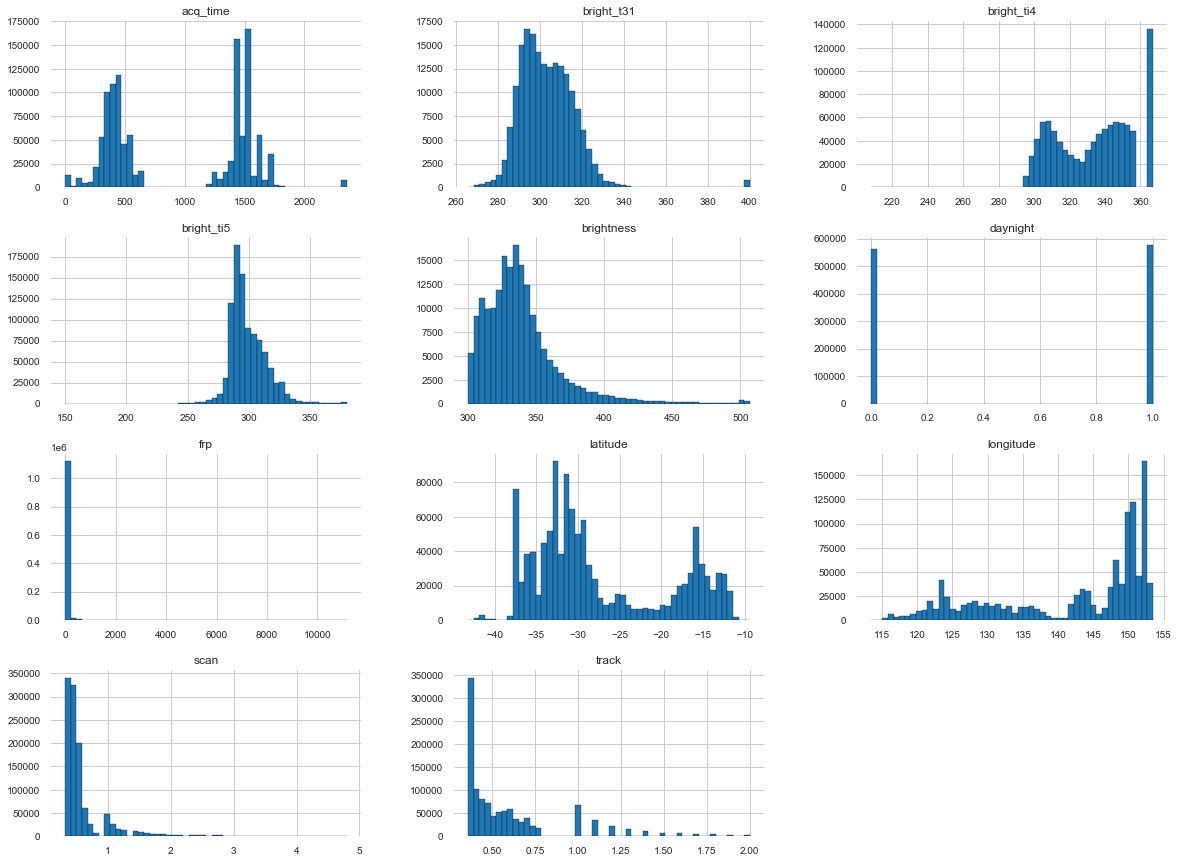

In [68]:
fire_merged.hist(bins=50, figsize=(20,15), edgecolor='black');

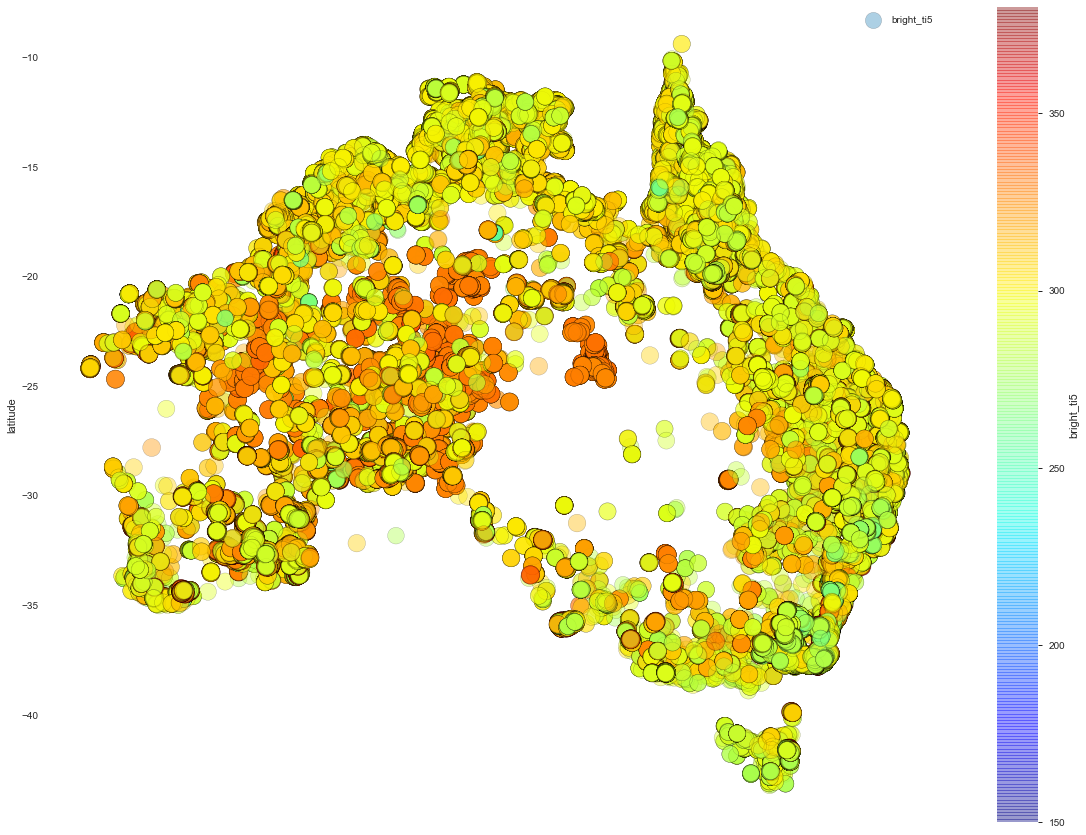

In [84]:
fire_merged.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, edgecolor='black', figsize=(20,15),
                s=fire_merged['bright_ti5'], label='bright_ti5', c='bright_ti5', cmap=plt.get_cmap('jet'), 
                colorbar=True);
plt.legend();

No handles with labels found to put in legend.


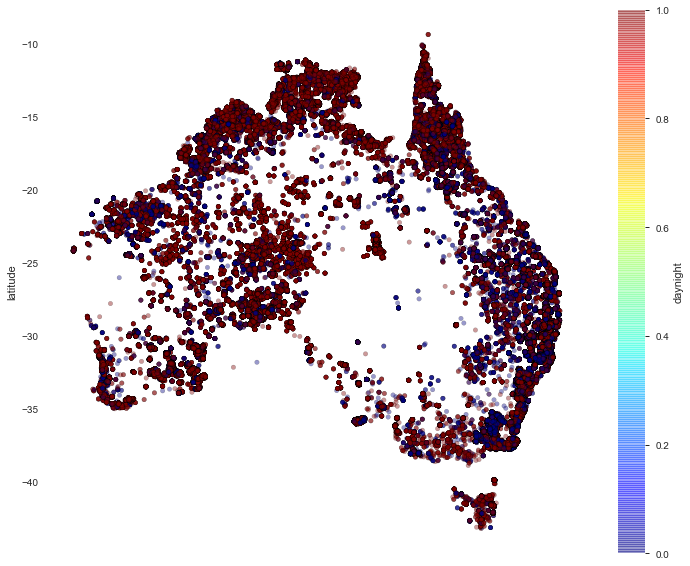

In [73]:
fire_merged.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, edgecolor='black', figsize=(12,10),
                 c='daynight', cmap=plt.get_cmap('jet'), 
                 colorbar=True);
plt.legend();

/Users/akukelo/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

/Users/akukelo/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.

/Users/akukelo/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

/Users/akukelo/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplo

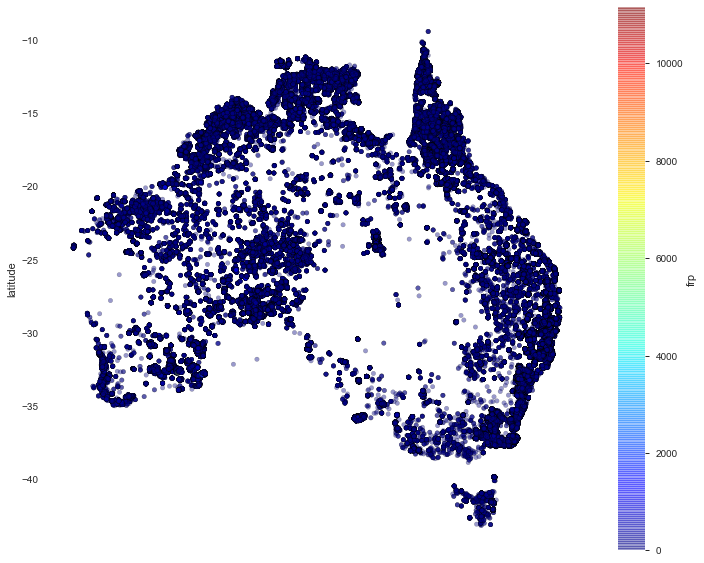

In [76]:
fire_merged.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, edgecolor='black', figsize=(12,10),
                 c='frp', cmap=plt.get_cmap('jet'), 
                 colorbar=True);